In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Cleaned_Data.xlsx')

In [3]:
df

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30,150
10678,10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35,155
10679,10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,8,20,11,20,3,0,180
10680,10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40,160


Identifying data type

In [4]:
cat_col = [col for col in df.columns if df[col].dtype=="object"]

In [5]:
num_col = [col for col in df.columns if df[col].dtype!="object"]

In [6]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [7]:
num_col

['Unnamed: 0',
 'Date_of_Journey',
 'Price',
 'journey_day',
 'journey_month',
 'journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins']

In [8]:
unique_source=df['Source'].unique()

In [9]:
for source in unique_source:
    df['Source_'+source] = df['Source'].apply(lambda x : 1 if x==source else 0)

In [10]:
df

,Unnamed: 0,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,...,1,10,2,50,170,1,0,0,0,0
1,1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,...,13,15,7,25,445,0,1,0,0,0
2,2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,...,4,25,19,0,1140,0,0,1,0,0
3,3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,...,23,30,5,25,325,0,1,0,0,0
4,4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,...,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,...,22,25,2,30,150,0,1,0,0,0
10678,10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,...,23,20,2,35,155,0,1,0,0,0
10679,10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,...,11,20,3,0,180,1,0,0,0,0
10680,10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,...,14,10,2,40,160,1,0,0,0,0


In [11]:
average_price_Airlines=df.groupby(['Airline'])['Price'].mean().sort_values()

In [12]:
airlines=df.groupby(['Airline'])['Price'].mean().sort_values().index

In [13]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [14]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [15]:
import pickle

In [16]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [17]:
df['Airline'] = df['Airline'].map(dict_airlines)

# Destination Encoding

In [18]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [19]:
df['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [20]:
dest = df.groupby(['Destination'])['Price'].mean().sort_values().index

In [21]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [22]:
df['Destination'] = df['Destination'].map(dict_dest)

In [23]:
df['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10677    3
10678    3
10679    2
10680    2
10681    4
Name: Destination, Length: 10682, dtype: int64

# Stops

In [24]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [25]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [26]:
df['Total_Stops'] = df['Total_Stops'].map(stop)

In [27]:
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10677    0
10678    0
10679    0
10680    0
10681    2
Name: Total_Stops, Length: 10682, dtype: int64

# Removing Unnecessary Data

In [28]:
df.drop(columns=['Unnamed: 0','Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source'] , axis=1 , inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10682 non-null  int64  
 1   Destination          10682 non-null  int64  
 2   Total_Stops          10682 non-null  int64  
 3   Price                10682 non-null  float64
 4   journey_day          10682 non-null  int64  
 5   journey_month        10682 non-null  int64  
 6   Dep_Time_hour        10682 non-null  int64  
 7   Dep_Time_minute      10682 non-null  int64  
 8   Arrival_Time_hour    10682 non-null  int64  
 9   Arrival_Time_minute  10682 non-null  int64  
 10  Duration_hours       10682 non-null  int64  
 11  Duration_mins        10682 non-null  int64  
 12  Source_Banglore      10682 non-null  int64  
 13  Source_Kolkata       10682 non-null  int64  
 14  Source_Delhi         10682 non-null  int64  
 15  Source_Chennai       10682 non-null 

In [30]:
df.drop(columns=['Route','Duration','journey_year'] , axis=1 , inplace=True)


In [31]:
with open('encodings.pkl', 'wb') as file:
    pickle.dump(unique_source, file)
    pickle.dump(dict_airlines, file)
    pickle.dump(dict_dest, file)
    pickle.dump(stop, file)
    

# Outliers

In [32]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , orient='h', ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

/tmp/ipykernel_7191/2671849717.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , ax=ax1)
/tmp/ipykernel_7191/2671849717.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , ax=ax3 , kde=False)


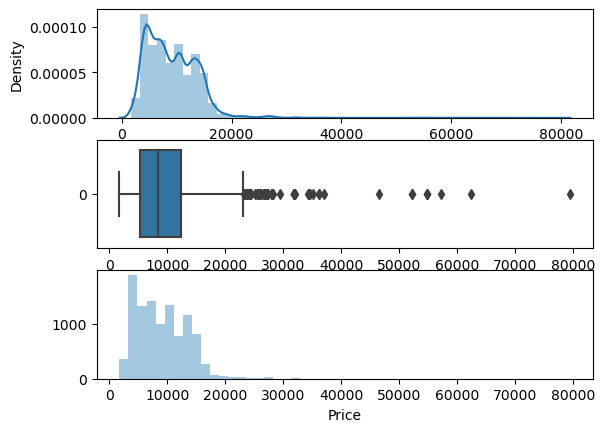

In [33]:
plot(df , 'Price')

In [34]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [35]:
print([price for price in df['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [36]:
len([price for price in df['Price'] if price> maximum or price<minimum])

94

In [37]:
df['Price'] = np.where(df['Price']>=35000 , df['Price'].median() , df['Price'])

/tmp/ipykernel_7191/2671849717.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , ax=ax1)
/tmp/ipykernel_7191/2671849717.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col] , ax=ax3 , kde=False)


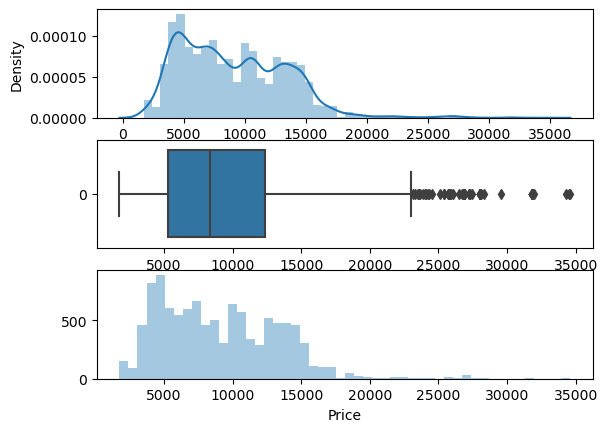

In [38]:
plot(df , 'Price')

In [39]:
pd.DataFrame.to_excel(df,'Prepared_Data.xlsx')